**DECISION TREE**

Importing libraries

In [12]:
import torch
import tensorflow as tf
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from dataset import TimeSeriesDataset
from dataset import NumpyToTensor
import sklearn
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error

Importing data

In [13]:
train_dataa = pd.read_csv("data/train_delhi_aqi.csv")
test_dataa = pd.read_csv("data/test_delhi_aqi.csv")

In [100]:
# need to be tuned:
sequence_size = 10
num_levels = 6
min_samples_split = 1/(12*13*10)
min_samples_leaf = 1/(12*13*100)

Setting up dataloader

In [80]:
train_data = TimeSeriesDataset(train_dataa,sequence_size)
# train_dataloader = DataLoader(dataset=train_data, batch_size = math.ceil(len(train_data)/(12*13)), shuffle=False, num_workers=2)
train_dataloader = DataLoader(dataset=train_data, batch_size = 10000, shuffle=False, num_workers=2)

Converting the dataloader into an iterable

In [81]:
dataiter = iter(train_dataloader)

In [82]:
data = next(dataiter)

Creating the tree classes

In [83]:
# # Fit regression model
# regr_1 = DecisionTreeRegressor(max_depth=2)
# regr_2 = DecisionTreeRegressor(max_depth=5)
# regr_1.fit(X, y)
# regr_2.fit(X, y)

# # Predict
# X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# y_1 = regr_1.predict(X_test)
# y_2 = regr_2.predict(X_test)


In [84]:
tree6 = DecisionTreeRegressor(max_depth=num_levels, criterion='squared_error', min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

tree2= DecisionTreeRegressor(max_depth=2, criterion='squared_error', min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

tree5= DecisionTreeRegressor(max_depth=5, criterion='squared_error', min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

tree4= DecisionTreeRegressor(max_depth=4, criterion='squared_error', min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

tree7= DecisionTreeRegressor(max_depth=7, criterion='squared_error', min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

Training Loop

In [85]:
epochs = 2
size = len(train_data)
niters = math.ceil(size/100)
print(size, niters)

2516544 25166


In [92]:
for ep in range(epochs):
    for i, (x, y) in enumerate(train_dataloader):
        tree2.fit(x,y)
        tree4.fit(x,y)
        tree5.fit(x,y)
        tree6.fit(x,y)
        tree7.fit(x,y)
        if i%10==0:
            ypred6 = tree6.predict(x)
            ypred5 = tree5.predict(x)
            ypred7 = tree7.predict(x)
            ypred4 = tree4.predict(x)
            ypred2 = tree2.predict(x)
            err6 = mean_squared_error(y,ypred6)
            err7 = mean_squared_error(y,ypred7)
            err2 = mean_squared_error(y,ypred2)
            err4 = mean_squared_error(y,ypred4)
            err5 = mean_squared_error(y,ypred5)
            print(f'Epoch {ep}, Iteration {i}, tree 2, train error: {err2}')
            print(f'Epoch {ep}, Iteration {i}, tree 4, train error: {err4}')
            print(f'Epoch {ep}, Iteration {i}, tree 5, train error: {err5}')
            print(f'Epoch {ep}, Iteration {i}, tree 6, train error: {err6}')
            print(f'Epoch {ep}, Iteration {i}, tree 7, train error: {err7}')
    print(f'epoch {ep}/{epochs} completed')
    break

Epoch 0, Iteration 0, tree 2, train error: 690.1773010072923
Epoch 0, Iteration 0, tree 4, train error: 54.49282938239146
Epoch 0, Iteration 0, tree 5, train error: 14.30383394476473
Epoch 0, Iteration 0, tree 6, train error: 3.2884347635210784
Epoch 0, Iteration 0, tree 7, train error: 0.7774152713750636
Epoch 0, Iteration 10, tree 2, train error: 685.5116643724209
Epoch 0, Iteration 10, tree 4, train error: 55.63692406490146
Epoch 0, Iteration 10, tree 5, train error: 13.797285788048871
Epoch 0, Iteration 10, tree 6, train error: 3.3163461430428027
Epoch 0, Iteration 10, tree 7, train error: 0.8002547093320581
Epoch 0, Iteration 20, tree 2, train error: 702.9293569239989
Epoch 0, Iteration 20, tree 4, train error: 57.72890163823642
Epoch 0, Iteration 20, tree 5, train error: 15.117647234269313
Epoch 0, Iteration 20, tree 6, train error: 3.578740474535975
Epoch 0, Iteration 20, tree 7, train error: 0.8689433798812294
Epoch 0, Iteration 30, tree 2, train error: 698.6787494409504
Epoch 

In [93]:
i

251

Testing Loop

In [94]:
test_data = TimeSeriesDataset(test_dataa,sequence_size)
test_dataloader = DataLoader(dataset=test_data, batch_size = 1, shuffle=False, num_workers = 3)
len(test_data)

139800

In [118]:
#calc error
# errs2 = torch.empty((len(test_data),1))
# errs4 = torch.empty((len(test_data),1))
errs5 = torch.empty((len(test_data),1))
errs6 = torch.empty((len(test_data),1))
errs7 = torch.empty((len(test_data),1))
preds5 = np.empty((len(test_data),1))
preds6 = np.empty((len(test_data),1))
preds7 = np.empty((len(test_data),1))
Y = torch.empty((len(test_data),1))
for ep in range(1):
    for i, (x,y) in enumerate(test_dataloader):
        Y[i] = y
        ypred6 = tree6.predict(x)
        preds5[i] = ypred6
        ypred5 = tree5.predict(x)
        preds6[i] = ypred5
        ypred7 = tree7.predict(x)
        preds7[i] = ypred7
        # ypred4 = tree4.predict(x)
        # ypred2 = tree2.predict(x)
        err6 = mean_squared_error(y,ypred6)
        err7 = mean_squared_error(y,ypred7)
        # err2 = mean_squared_error(y,ypred2)
        # err4 = mean_squared_error(y,ypred4)
        err5 = mean_squared_error(y,ypred5)
        # errs2[i] = mean_squared_error(y,ypred2)
        # errs4[i] = mean_squared_error(y,ypred4)
        errs5[i] = mean_squared_error(y,ypred5)
        errs6[i] = mean_squared_error(y,ypred6)
        errs7[i] = mean_squared_error(y,ypred7)

In [119]:
i

139799

In [130]:
from sklearn.metrics import r2_score

In [133]:
# print(f'Tree2 max error: {torch.max(errs2)}, min error: {torch.min(errs2)}, mean error: {torch.sum(errs2)/i}')
# print(f'Tree4 max error: {torch.max(errs4)}, min error: {torch.min(errs4)}, mean error: {torch.sum(errs4)/i}')
print(f'Tree5 max error: {torch.max(errs5)}, min error: {torch.min(errs5)}, mean error: {torch.sum(errs5)/i}')
print(f'mean error using the entire set: {mean_squared_error(Y, preds5)}, R2 score: {r2_score(Y,preds5)}')
print('\n')
print(f'Tree6 max error: {torch.max(errs6)}, min error: {torch.min(errs6)}, mean error: {torch.sum(errs6)/i}')
print(f'mean error using the entire set: {mean_squared_error(Y, preds6)}, R2 score: {r2_score(Y,preds6)}')
print('\n')
print(f'Tree7 max error: {torch.max(errs7)}, min error: {torch.min(errs7)}, mean error: {torch.sum(errs7)/i}')
print(f'mean error using the entire set: {mean_squared_error(Y, preds7)}, R2 score: {r2_score(Y,preds7)}')

Tree5 max error: 238.28211975097656, min error: 0.0, mean error: 14.848798751831055
mean error using the entire set: 3.669541200295182, R2 score: 0.9995477794626862


Tree6 max error: 132.864013671875, min error: 0.0, mean error: 3.669567346572876
mean error using the entire set: 14.848692551823039, R2 score: 0.9981701026483498


Tree7 max error: 144.64068603515625, min error: 0.0, mean error: 0.9786754250526428
mean error using the entire set: 0.9786684576730448, R2 score: 0.9998793925584634


In [101]:
valid = pd.read_csv("data/val_delhi_aqi.csv")
validation_data = TimeSeriesDataset(valid,sequence_size)
validation_dataloader = DataLoader(dataset=validation_data, batch_size=1,shuffle=False, num_workers=3)
len(validation_data)

139800

In [102]:
#calc error
errs2 = torch.empty((len(test_data),1))
errs4 = torch.empty((len(test_data),1))
errs5 = torch.empty((len(test_data),1))
errs6 = torch.empty((len(test_data),1))
errs7 = torch.empty((len(test_data),1))

for i, (x,y) in enumerate(validation_dataloader):
    ypred6 = tree6.predict(x)
    ypred5 = tree5.predict(x)
    ypred7 = tree7.predict(x)
    ypred4 = tree4.predict(x)
    ypred2 = tree2.predict(x)
    err6 = mean_squared_error(y,ypred6)
    err7 = mean_squared_error(y,ypred7)
    err2 = mean_squared_error(y,ypred2)
    err4 = mean_squared_error(y,ypred4)
    err5 = mean_squared_error(y,ypred5)
    errs2[i] = err2
    errs4[i] = err4
    errs5[i] = err5
    errs6[i] = err6
    errs7[i] = err7

In [103]:
print(f'Tree2 max error: {torch.max(errs2)}, min error: {torch.min(errs2)}, mean error: {torch.sum(errs2)/i}')
print(f'Tree4 max error: {torch.max(errs4)}, min error: {torch.min(errs4)}, mean error: {torch.sum(errs4)/i}')
print(f'Tree5 max error: {torch.max(errs5)}, min error: {torch.min(errs5)}, mean error: {torch.sum(errs5)/i}')
print(f'Tree6 max error: {torch.max(errs6)}, min error: {torch.min(errs6)}, mean error: {torch.sum(errs6)/i}')
print(f'Tree7 max error: {torch.max(errs7)}, min error: {torch.min(errs7)}, mean error: {torch.sum(errs7)/i}')

Tree2 max error: 7193.166015625, min error: 1.3514174668216583e-07, mean error: 700.3424682617188
Tree4 max error: 864.1771240234375, min error: 4.42007070944328e-08, mean error: 57.234230041503906
Tree5 max error: 238.28211975097656, min error: 0.0, mean error: 14.94035816192627
Tree6 max error: 148.67735290527344, min error: 0.0, mean error: 3.6838862895965576
Tree7 max error: 126.5374755859375, min error: 0.0, mean error: 0.9798327684402466


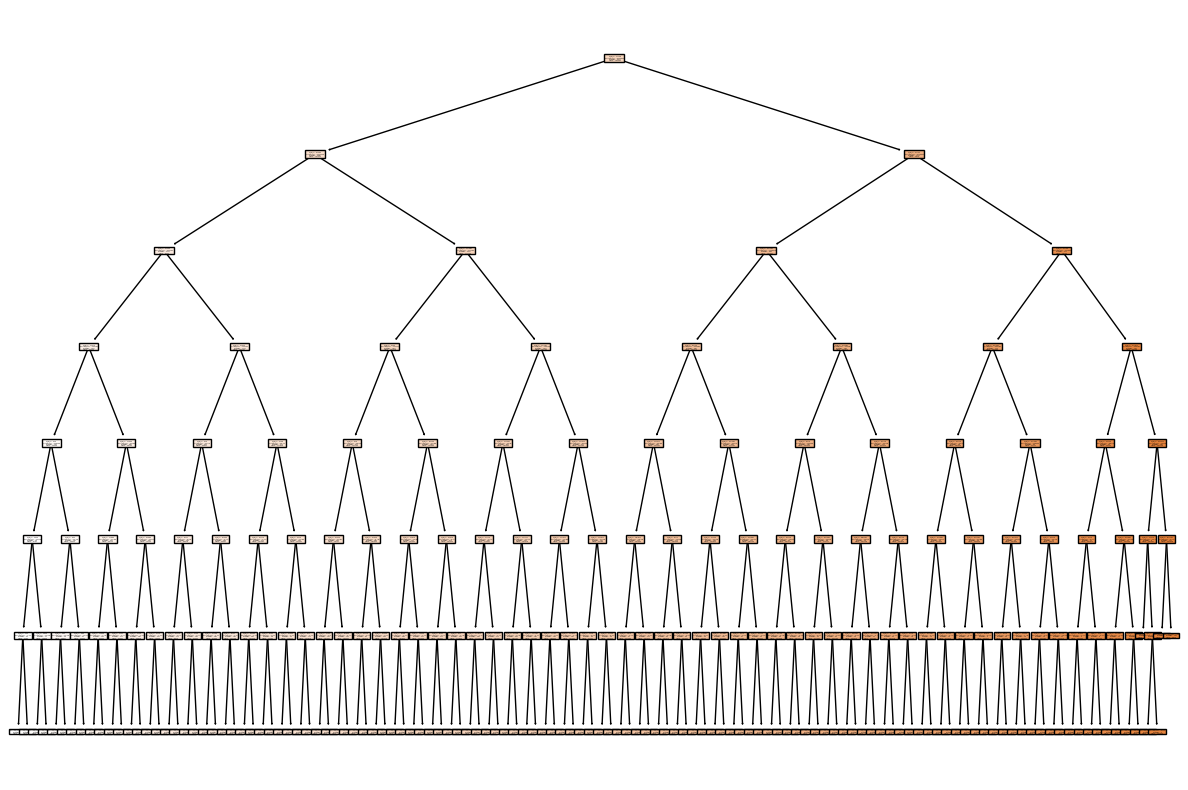

In [107]:
plt.figure(figsize=(15, 10))
plot_tree(tree7, filled=True)
plt.show()

Validation test with different sequence length (1 instead of 10)

In [111]:
validation_data = TimeSeriesDataset(valid,10)
validation_dataloader = DataLoader(dataset=validation_data, batch_size=1,shuffle=False, num_workers=3)
len(validation_data)

139800

In [112]:
#calc error
errs2 = torch.empty((len(test_data),1))
errs4 = torch.empty((len(test_data),1))
errs5 = torch.empty((len(test_data),1))
errs6 = torch.empty((len(test_data),1))
errs7 = torch.empty((len(test_data),1))

for i, (x,y) in enumerate(validation_dataloader):
    ypred6 = tree6.predict(x)
    ypred5 = tree5.predict(x)
    ypred7 = tree7.predict(x)
    ypred4 = tree4.predict(x)
    ypred2 = tree2.predict(x)
    err6 = mean_squared_error(y,ypred6)
    err7 = mean_squared_error(y,ypred7)
    err2 = mean_squared_error(y,ypred2)
    err4 = mean_squared_error(y,ypred4)
    err5 = mean_squared_error(y,ypred5)
    errs2[i] = err2
    errs4[i] = err4
    errs5[i] = err5
    errs6[i] = err6
    errs7[i] = err7

KeyboardInterrupt: 

In [ ]:
print(f'Tree2 max error: {torch.max(errs2)}, min error: {torch.min(errs2)}, mean error: {torch.sum(errs2)/i}')
print(f'Tree4 max error: {torch.max(errs4)}, min error: {torch.min(errs4)}, mean error: {torch.sum(errs4)/i}')
print(f'Tree5 max error: {torch.max(errs5)}, min error: {torch.min(errs5)}, mean error: {torch.sum(errs5)/i}')
print(f'Tree6 max error: {torch.max(errs6)}, min error: {torch.min(errs6)}, mean error: {torch.sum(errs6)/i}')
print(f'Tree7 max error: {torch.max(errs7)}, min error: {torch.min(errs7)}, mean error: {torch.sum(errs7)/i}')